## Most Probable Distribution and Ising Model

## Prepare the notebook

In [1]:
import sys

In [2]:
sys.path.append('../app')

In [3]:
from utils.model import Ising

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## Calculate distributions

Define a function to generate the distributions

In [6]:
??Ising

Init signature: Ising(params)
Docstring:      <no docstring>
Source:        
class Ising():
    def __init__(self, params):
        self.width = params.get('width') or 20
        self.height = params.get('height') or 20
        self.states = params.get('states') or [-1,1]
        self.max_steps = params.get('max_steps') or 100000
        self.observables = params.get('observables') or []


    def distribution(self):
        """
        distribution calculates the number of microstates for each energy level.
        """


        # generate possible combinations out of the states
        list_of_states_at_row = [self.states] * self.height
        rows = list(
            _product(*list_of_states_at_row)
        )

        list_of_rows = [rows] * self.width

        all_states = list(
            _product(*list_of_rows)
        )

        all_states_count = len(all_states)

        distribution = []
        for state_i in all_states:
            self.state = state_i
            ene = se

In [7]:
ising_test = Ising({
        'width': 2,
        'height': 2
    })
ising_test.distribution()

In [8]:
ising_test.dist

{'total_states': 16,
 'states': [{'energy': -2.5,
   'state': ((-1, -1), (-1, -1)),
   'dist': {-4: 4},
   'spin_dist': {-1: 4, 1: 0}},
  {'energy': 0.75,
   'state': ((-1, -1), (-1, 1)),
   'dist': {-4: 1, 0: 2, 4: 1},
   'spin_dist': {-1: 3, 1: 1}},
  {'energy': 0.75,
   'state': ((-1, -1), (1, -1)),
   'dist': {0: 2, -4: 1, 4: 1},
   'spin_dist': {-1: 3, 1: 1}},
  {'energy': 0.0,
   'state': ((-1, -1), (1, 1)),
   'dist': {0: 4},
   'spin_dist': {-1: 2, 1: 2}},
  {'energy': -0.75,
   'state': ((-1, 1), (-1, -1)),
   'dist': {0: 2, 4: 1, -4: 1},
   'spin_dist': {-1: 3, 1: 1}},
  {'energy': 0.0,
   'state': ((-1, 1), (-1, 1)),
   'dist': {0: 4},
   'spin_dist': {-1: 2, 1: 2}},
  {'energy': 2.5,
   'state': ((-1, 1), (1, -1)),
   'dist': {4: 4},
   'spin_dist': {-1: 2, 1: 2}},
  {'energy': -0.75,
   'state': ((-1, 1), (1, 1)),
   'dist': {4: 1, 0: 2, -4: 1},
   'spin_dist': {-1: 1, 1: 3}},
  {'energy': -0.75,
   'state': ((1, -1), (-1, -1)),
   'dist': {4: 1, 0: 2, -4: 1},
   'spin_dis

In [21]:
def _dist_extraction(dist):
    
    dist_keys = list(
        set(sum([
            list(i.keys()) for i in dist
        ],[]))
    )
    dist_keys.sort()
    
    dist_values = [
        [i.get(j,0) for j in dist_keys] for i in dist
    ]
    
    dist_counts = {}
    for i in dist_values:
        dist_counts[tuple(i)] = {
            'counts': dist_values.count(i),
            'total_energy': sum([x*y for x,y in zip(dist_keys,i)])/4
        }
    
    dist_dict = {
        'states': tuple(dist_keys),
        'counts': dist_counts
    }
    
    return dist_dict

In [7]:
def _calc_distribution(ising_param):
    
    ising = Ising(ising_param)
    ising.distribution()
    states = ising.dist.get('states')
    total_states = ising.dist.get('total_states')
    energies = [i.get('energy') for i in states]
    dist = [i.get('dist') for i in states]
    spin_dist = [i.get('spin_dist') for i in states]
    
    return {
        'energies': energies, 
        'total_states': total_states, 
        'dist': _dist_extraction(dist), 
        'spin_dist': _dist_extraction(spin_dist)
    }

In [8]:
model_2 = _calc_distribution({
        'width': 2,
        'height': 2
    })

In [9]:
model_2_dist = list(
    model_2.get('dist').get('counts').values()
)
model_2_dist = sorted(model_2_dist, key = lambda i: i['counts'])

In [22]:
model_2

{'energies': [-2.5,
  0.75,
  0.75,
  0.0,
  -0.75,
  0.0,
  2.5,
  -0.75,
  -0.75,
  2.5,
  0.0,
  -0.75,
  0.0,
  0.75,
  0.75,
  -2.5],
 'total_states': 16,
 'dist': {'states': (-4, 0, 4),
  'counts': {(8, 0, 0): {'counts': 2, 'total_energy': -8.0},
   (1, 2, 1): {'counts': 8, 'total_energy': 0.0},
   (0, 8, 0): {'counts': 4, 'total_energy': 0.0},
   (0, 0, 8): {'counts': 2, 'total_energy': 8.0}}},
 'spin_dist': {'states': (-1, 1),
  'counts': {(4, 0): {'counts': 1, 'total_energy': -1.0},
   (3, 1): {'counts': 4, 'total_energy': -0.5},
   (2, 2): {'counts': 6, 'total_energy': 0.0},
   (1, 3): {'counts': 4, 'total_energy': 0.5},
   (0, 4): {'counts': 1, 'total_energy': 1.0}}}}

Text(0, 0.5, 'Total Energy')

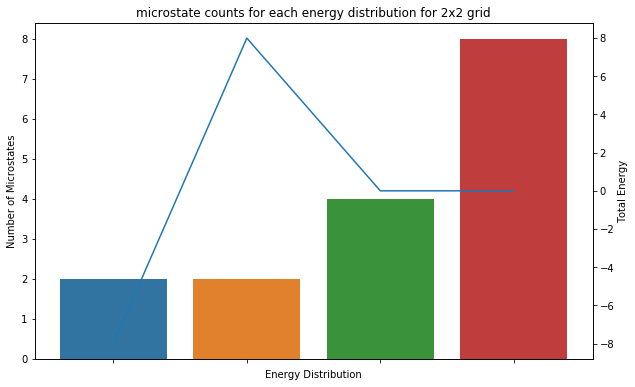

In [23]:
fig, ax = plt.subplots(figsize=(10,6.18))
x = list(range(len(model_2_dist)))
sns.barplot(x, [i['counts'] for i in model_2_dist], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x, [i['total_energy'] for i in model_2_dist], ax=ax2,markers=True)
ax.set_xticklabels([])
ax.set_xlabel('Energy Distribution')
ax.set_ylabel('Number of Microstates')
ax.set_title('microstate counts for each energy distribution for 2x2 grid')
ax2.set_ylabel('Total Energy')

In [12]:
model_3 = _calc_distribution({
        'width': 3,
        'height': 3
    })

In [13]:
model_3_dist = list(
    model_3.get('dist').get('counts').values()
)
model_3_dist = sorted(model_3_dist, key = lambda i: i['counts'])

Text(0, 0.5, 'Total Energy')

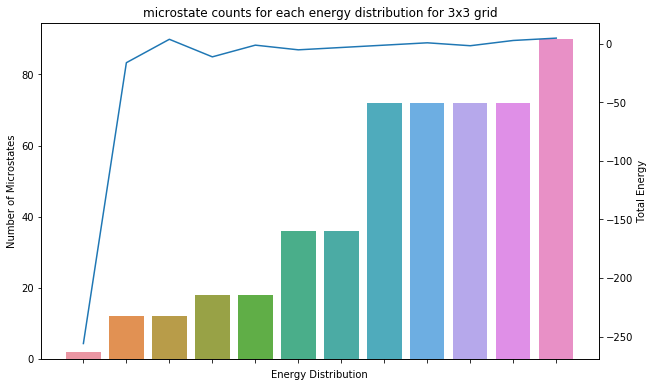

In [14]:
fig, ax = plt.subplots(figsize=(10,6.18))
x = list(range(len(model_3_dist)))
sns.barplot(x, [i['counts'] for i in model_3_dist], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x, [i['total_energy'] for i in model_3_dist], ax=ax2, markers=True)
ax.set_xticklabels([])
ax.set_xlabel('Energy Distribution')
ax.set_ylabel('Number of Microstates')
ax.set_title('microstate counts for each energy distribution for 3x3 grid')
ax2.set_ylabel('Total Energy')

In [156]:
model_4 = _calc_distribution({
        'width': 4,
        'height': 4
    })

In [157]:
model_4_dist = list(
    model_4.get('dist').get('counts').values()
)
model_4_dist = sorted(model_4_dist, key = lambda i: i['counts'])

Text(0, 0.5, 'Total Energy')

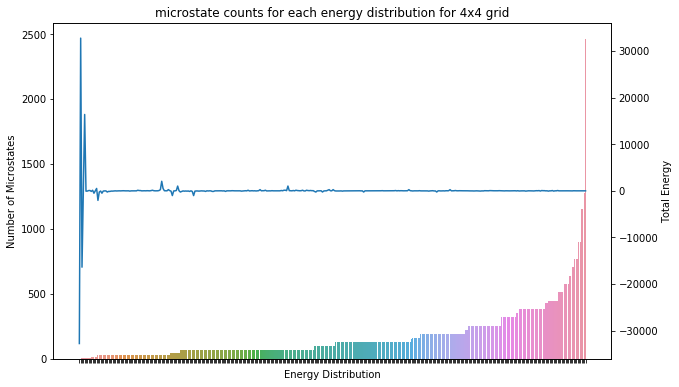

In [169]:
fig, ax = plt.subplots(figsize=(10,6.18))
x = list(range(len(model_4_dist)))
sns.barplot(x, [i['counts'] for i in model_4_dist], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x, [i['total_energy'] for i in model_4_dist], ax=ax2, markers=True)
ax.set_xticklabels([])
ax.set_xlabel('Energy Distribution')
ax.set_ylabel('Number of Microstates')
ax.set_title('microstate counts for each energy distribution for 4x4 grid')
ax2.set_ylabel('Total Energy')

## Microstates with the same energy

Equal a priori principle requires the microstates to follow some restrictions.

In [15]:
model_2.get('spin_dist')

{'states': (-1, 1),
 'counts': {(4, 0): {'counts': 1, 'total_energy': -1.0},
  (3, 1): {'counts': 4, 'total_energy': -0.5},
  (2, 2): {'counts': 6, 'total_energy': 0.0},
  (1, 3): {'counts': 4, 'total_energy': 0.5},
  (0, 4): {'counts': 1, 'total_energy': 1.0}}}

In [16]:
[
    {i:val} for i, val in model_2.get('dist').get('counts').items()
    if val.get('total_energy') == 0
]

[{(1, 2, 1): {'counts': 8, 'total_energy': 0.0}},
 {(0, 8, 0): {'counts': 4, 'total_energy': 0.0}}]

In [17]:
model_3.get('spin_dist')

{'states': (-1, 1),
 'counts': {(9, 0): {'counts': 1, 'total_energy': -2.25},
  (8, 1): {'counts': 9, 'total_energy': -1.75},
  (7, 2): {'counts': 36, 'total_energy': -1.25},
  (6, 3): {'counts': 84, 'total_energy': -0.75},
  (5, 4): {'counts': 126, 'total_energy': -0.25},
  (4, 5): {'counts': 126, 'total_energy': 0.25},
  (3, 6): {'counts': 84, 'total_energy': 0.75},
  (2, 7): {'counts': 36, 'total_energy': 1.25},
  (1, 8): {'counts': 9, 'total_energy': 1.75},
  (0, 9): {'counts': 1, 'total_energy': 2.25}}}

In [185]:
[
    {i:val} for i, val in model_3.get('dist').get('counts').items()
    if val.get('total_energy') == -4
]

[{(0, 8, 1, 2, 2): {'counts': 36, 'total_energy': -4}},
 {(1, 2, 8, 2, 0): {'counts': 18, 'total_energy': -4}},
 {(2, 0, 16, 2, 0): {'counts': 18, 'total_energy': -4}},
 {(1, 2, 16, 0, 1): {'counts': 18, 'total_energy': -4}}]

In [191]:
36*2+18

90

In [186]:
[
    {i:val} for i, val in model_4.get('dist').get('counts').items()
    if val.get('total_energy') == -4
]

[{(2, 8, 16, 2, 4): {'counts': 256, 'total_energy': -4}},
 {(4, 2, 64, 8, 0): {'counts': 128, 'total_energy': -4}},
 {(8, 2, 4, 8, 4): {'counts': 160, 'total_energy': -4}},
 {(4, 0, 256, 2, 2): {'counts': 64, 'total_energy': -4}},
 {(8, 4, 4, 16, 1): {'counts': 192, 'total_energy': -4}},
 {(1, 8, 128, 0, 4): {'counts': 32, 'total_energy': -4}}]

## Total Energy of the Microstates

Configure Ising model

In [28]:
ising_params = [
    {
        'width': 2,
        'height': 2
    },
    {
        'width': 3,
        'height': 3
    },
    {
        'width': 4,
        'height': 4
    },
    {
        'width': 5,
        'height': 5
    }
]

Calculate and plot the histogram of the energies

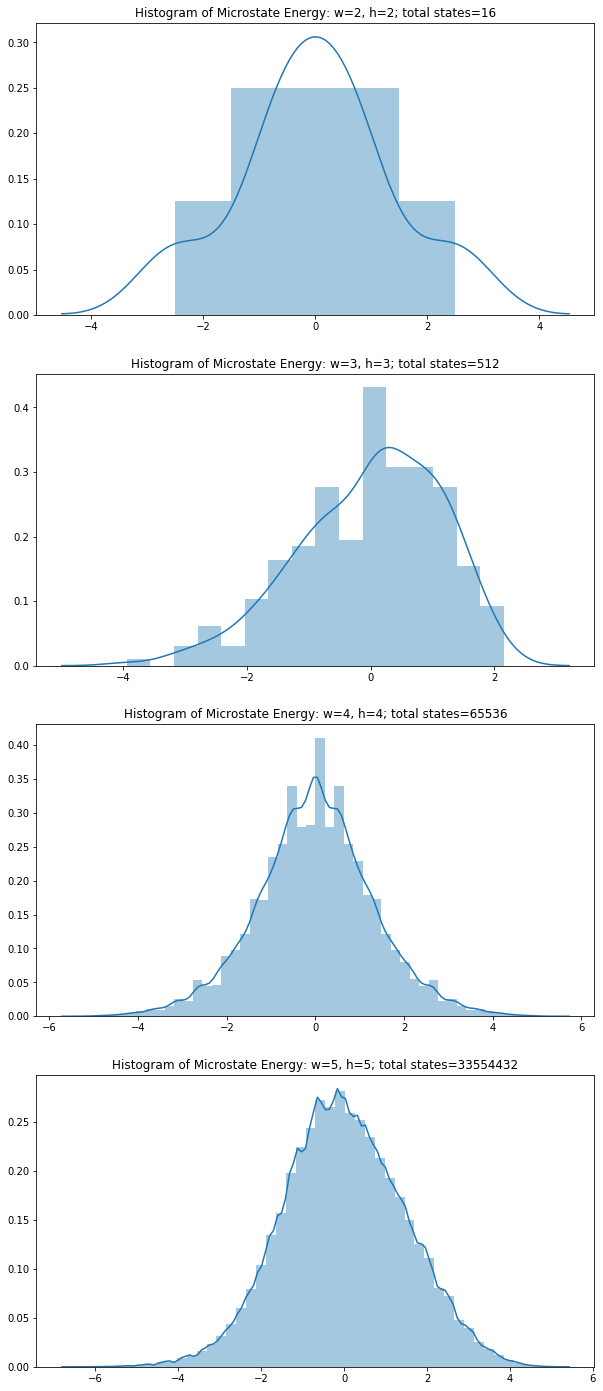

In [20]:
nrows=len(ising_params)

fig, ax = plt.subplots(nrows=nrows, figsize=(10, nrows * 6.18))

ax_flag = 0
for param in ising_params:
    ax_i = ax[ax_flag]
    energies, total_states = _calc_distribution(param)
    sns.distplot(energies, ax=ax_i)
    ax_i.set_title('Histogram of Microstate Energy: w={}, h={}; total states={}'.format(
        param.get('width'), param.get('height'), total_states
    ))
    ax_flag += 1

Extract energies 

In [44]:
%%timeit
_calc_distribution(ising_params[1])

9.65 ms ± 83.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
_calc_distribution(ising_params[2])

2.05 s ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We will need `512*2` seconds to calculate height=5 and width=5

In [10]:
((1,1), (1,-1)).count(-1)

0

In [13]:
sum(
    list(
        ((1,1), (1,-1))
    ),
    ()
)

(1, 1, 1, -1)